## Very Simple Pytorch Model

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [3]:
print(torch.__version__)

1.7.1


### Setting up Dummy Data and the model

In [4]:
# Dummy Data 
X = torch.randn(20,10)
y = torch.randint(0,2, (20,1)).type(torch.FloatTensor)

# to Gpu ... Good practice
X.to("cuda")
y.to("cuda")

# setting the variables for the layers 
input_units = 10
hidden_units = 5
output_units = 1

In [5]:

model = nn.Sequential(nn.Linear(input_units, hidden_units), \
    nn.ReLU(), \
    nn.Linear(hidden_units, output_units), \
    nn.Sigmoid())

loss_function = nn.MSELoss()

In [6]:
print(model)

Sequential(
  (0): Linear(in_features=10, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=1, bias=True)
  (3): Sigmoid()
)


### this would be a good place to understand optimizer

In [7]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


In [8]:
loss_funct = nn.MSELoss()

losses= []
for i in range(100):
    # Call to the model to perform a prediction
    y_pred = model(X)
    loss = loss_funct(y_pred, y)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i % 5 == 0:
        print(i, loss.item())
    
    
    
    

0 0.2522554099559784
5 0.2518072724342346
10 0.2513614892959595
15 0.25091788172721863
20 0.2504764199256897
25 0.25002989172935486
30 0.24957723915576935
35 0.2491285353899002
40 0.2486819475889206
45 0.2482374608516693
50 0.2477949857711792
55 0.24736878275871277
60 0.24695944786071777
65 0.24655146896839142
70 0.24614489078521729
75 0.24574077129364014
80 0.24533963203430176
85 0.24493971467018127
90 0.2445410192012787
95 0.24414339661598206


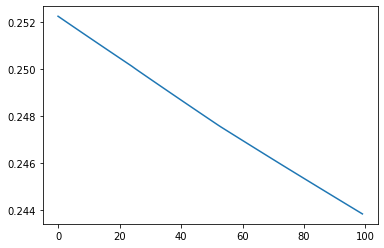

In [9]:
#Barebones plot
plt.plot(range(0,100), losses)
plt.show()
